In [1]:
### 필요한 라이브러리 불러오기!
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
### Advertising.csv를 불러와 데이터 로드하기!
df = pd.read_csv('Advertising.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
### Predictor Variable과 Response Variable을 설정해주세요!
raw_X = df.drop('sales', axis=1)
raw_y = df['sales']

In [16]:
raw_X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
raw_y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
raw_X = sm.add_constant(raw_X, has_constant = 'add')
raw_X

,const,TV,radio,newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [19]:
### Multiple Linear Regression을 수행해봅시다!

lin_model_1 = sm.OLS(raw_y, raw_X)
lin_model_1 = lin_model_1.fit()

In [20]:
lin_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        19:52:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

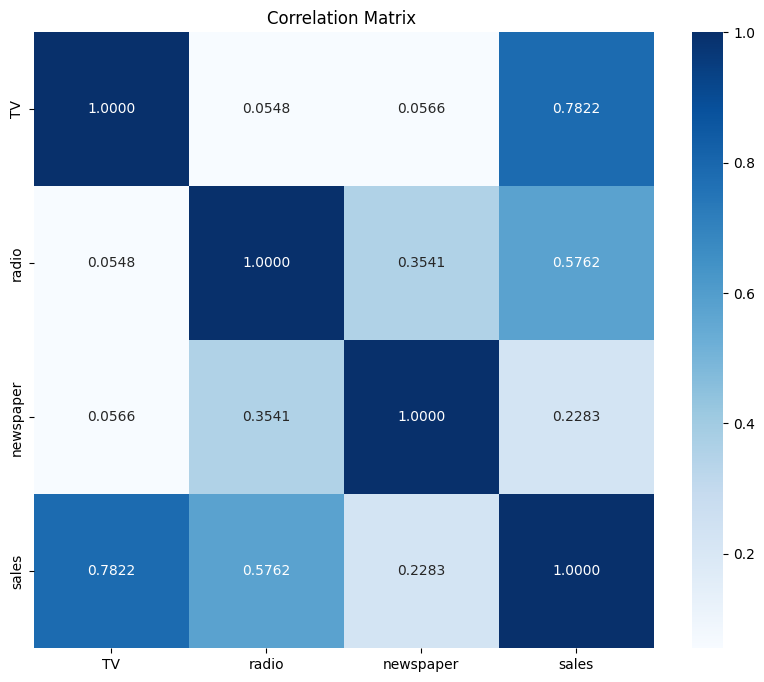

In [30]:
### Correlation Matrix를 만들어 출력해주세요!

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
#abs_corr_matrix = np.abs(corr_matrix)


sns.heatmap(abs_corr_matrix, annot=True, fmt=".4f", cmap='Blues')
plt.title('Correlation Matrix ')
plt.show()